# **Section B (Scratch Implementation)**

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
X = np.array([[5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0,  3.0], [6.7,  3.1], [4.5,  2.3], [6.1,  2.8], [5.2,  3.2], [5.5, 2.6], [5.0, 2.0], [8.0,  0.5], [7.5, 0.8],
             [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1], [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]])

# **Part A: K-means Clustering Algorithm from Scratch.**

In [ ]:
def KMeans(centroids, epochs=100, tol=1e-4, verbose=False):

    labels = np.zeros(len(X))

    for i in range(epochs):
        labels = np.array([np.argmin([np.sqrt(np.sum((i - j) ** 2)) for j in centroids]) for i in X])

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(len(centroids))])

        if verbose:
            print(f"\nIteration {i + 1}/{epochs}")
            print(f"{'-'*40}")
            print(f"Old Centroids: {', '.join(['(' + ', '.join(map(str, i)) + ')' for i in centroids])}")
            print(f"New Centroids: {', '.join(['(' + ', '.join(map(str, i)) + ')' for i in new_centroids])}")
            print(f"Labels: {' '.join([str(i) for i in labels])}")
            print(f"{'-'*40}")

        if np.allclose(new_centroids, centroids, atol=tol):
            if verbose:
                print(f"\nConverged After {i + 1} Iterations.\n")
            break

        centroids = new_centroids

    return centroids, labels

### Function to Plot Clusters

In [ ]:
def plot_clusters(X, labels, centroids, titles):

    rows = (len(labels) + 3) // 4
    cols = min(len(labels), 4)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows), squeeze=False)
    axes = axes.flatten()

    for i, (labels, centroids, title) in enumerate(zip(labels, centroids, titles)):
        ax = axes[i]
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
        ax.set_title(title)
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')

        for centroid in centroids:
            ax.text(centroid[0], centroid[1], f'({centroid[0]:.2f}, {centroid[1]:.2f})', color='black', fontsize=8)

        ax.legend()

    for i in range(len(labels), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

### Initialization

In [ ]:
initial_centroids = [[3.0, 3.0], [2.0, 2.0]]

# **Part B: Final Centroids and Comparing Clusters before and after process**

In [ ]:
final_centroids, labels = KMeans(initial_centroids, verbose=True)
print(f"\n\033[1;34mFinal Centroids: \033[1;92m{', '.join(['(' + ', '.join(map(str, i)) + ')' for i in final_centroids])}\033[0m\n")


Iteration 1/100
----------------------------------------
Old Centroids: (3.0, 3.0), (2.0, 2.0)
New Centroids: (5.770588235294118, 2.0176470588235293), (4.0625, -0.09999999999999999)
Labels: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0
----------------------------------------

Iteration 2/100
----------------------------------------
Old Centroids: (5.770588235294118, 2.0176470588235293), (4.0625, -0.09999999999999999)
New Centroids: (5.8, 2.125), (4.199999999999999, -0.05555555555555555)
Labels: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0
----------------------------------------

Iteration 3/100
----------------------------------------
Old Centroids: (5.8, 2.125), (4.199999999999999, -0.05555555555555555)
New Centroids: (5.8, 2.125), (4.199999999999999, -0.05555555555555555)
Labels: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0
----------------------------------------

Converged After 3 Iterations.


Final Centroids: (5.8, 2.125), (4.199999999999999, -0.05555555555555555

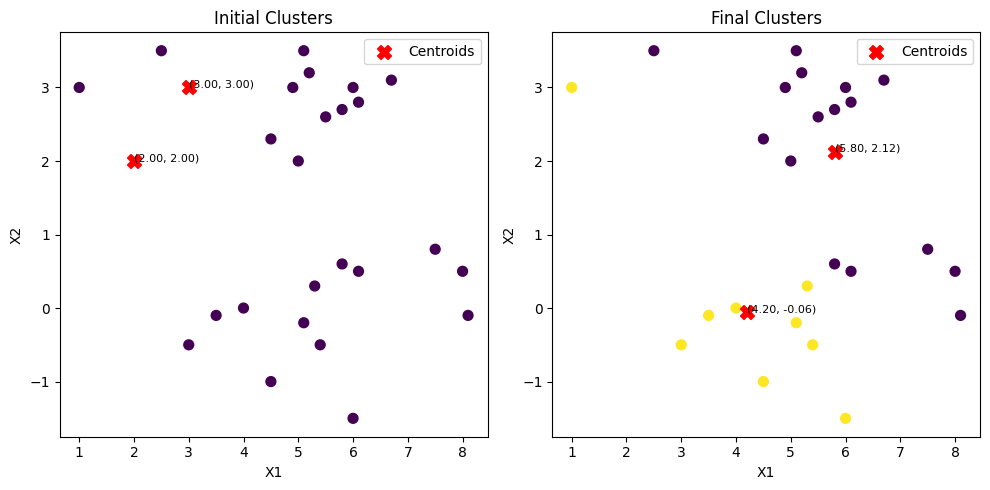

In [ ]:
plot_clusters(X, [np.zeros(len(X)), labels], [np.array(initial_centroids), final_centroids], ["Initial Clusters", "Final Clusters"])

In [ ]:
random_initial_centroids = X[np.random.choice(X.shape[0], size=2, replace=False)]

# **Part C: Comparing the Results for provided Initial Centroids vs Randomly Initialized Centroids**

In [ ]:
final_centroids_random, labels_random = KMeans(random_initial_centroids, verbose=True)
print(f"\n\033[1;34mFinal Centroids with Random Initialization: \033[1;92m{', '.join(['(' + ', '.join(map(str, i)) + ')' for i in final_centroids_random])}\033[0m\n")


Iteration 1/100
----------------------------------------
Old Centroids: (5.5, 2.6), (4.5, -1.0)
New Centroids: (5.35625, 2.31875), (4.988888888888889, -0.4)
Labels: 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0
----------------------------------------

Iteration 2/100
----------------------------------------
Old Centroids: (5.35625, 2.31875), (4.988888888888889, -0.4)
New Centroids: (5.061538461538462, 2.730769230769231), (5.3999999999999995, -0.16666666666666666)
Labels: 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
----------------------------------------

Iteration 3/100
----------------------------------------
Old Centroids: (5.061538461538462, 2.730769230769231), (5.3999999999999995, -0.16666666666666666)
New Centroids: (4.858333333333333, 2.891666666666667), (5.561538461538461, -0.09230769230769233)
Labels: 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
----------------------------------------

Iteration 4/100
----------------------------------------
Old Centroids: (4

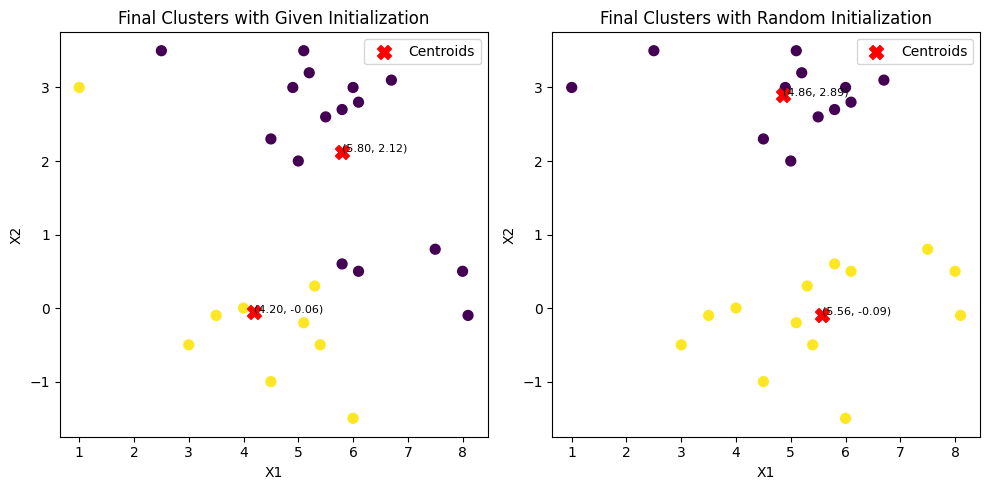

In [ ]:
plot_clusters(X, [labels, labels_random], [final_centroids, final_centroids_random], ["Final Clusters with Given Initialization", "Final Clusters with Random Initialization"])

# **Part D: Finding Optimal Number of Clusters**

In [ ]:
def wcss(labels, centroids):

    return sum([np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(len(centroids))])

### Function to get optimal value of K

In [ ]:
def get_K(WCSS):

    distances = []
    Ks = range(1, len(X) // 2 + 1)

    max_wcss = np.array([Ks[ 0], WCSS[ 0]])
    min_wcss = np.array([Ks[-1], WCSS[-1]])

    for i in range(len(Ks)):
        p = np.array([Ks[i], WCSS[i]])
        distances.append(np.abs(np.cross(min_wcss - max_wcss, p - max_wcss) / np.linalg.norm(min_wcss - max_wcss)))

    return Ks[np.argmax(distances)]

In [ ]:
WCSS = []
labels = []
centroids = []

### Finding optimal value of K by trying different values of K

In [ ]:
for k in range(1, len(X) // 2 + 1):
    final_centroids, label = KMeans(X[np.random.choice(X.shape[0], size=k, replace=False)])

    labels.append(label)
    centroids.append(final_centroids)
    WCSS.append(wcss(label, final_centroids))

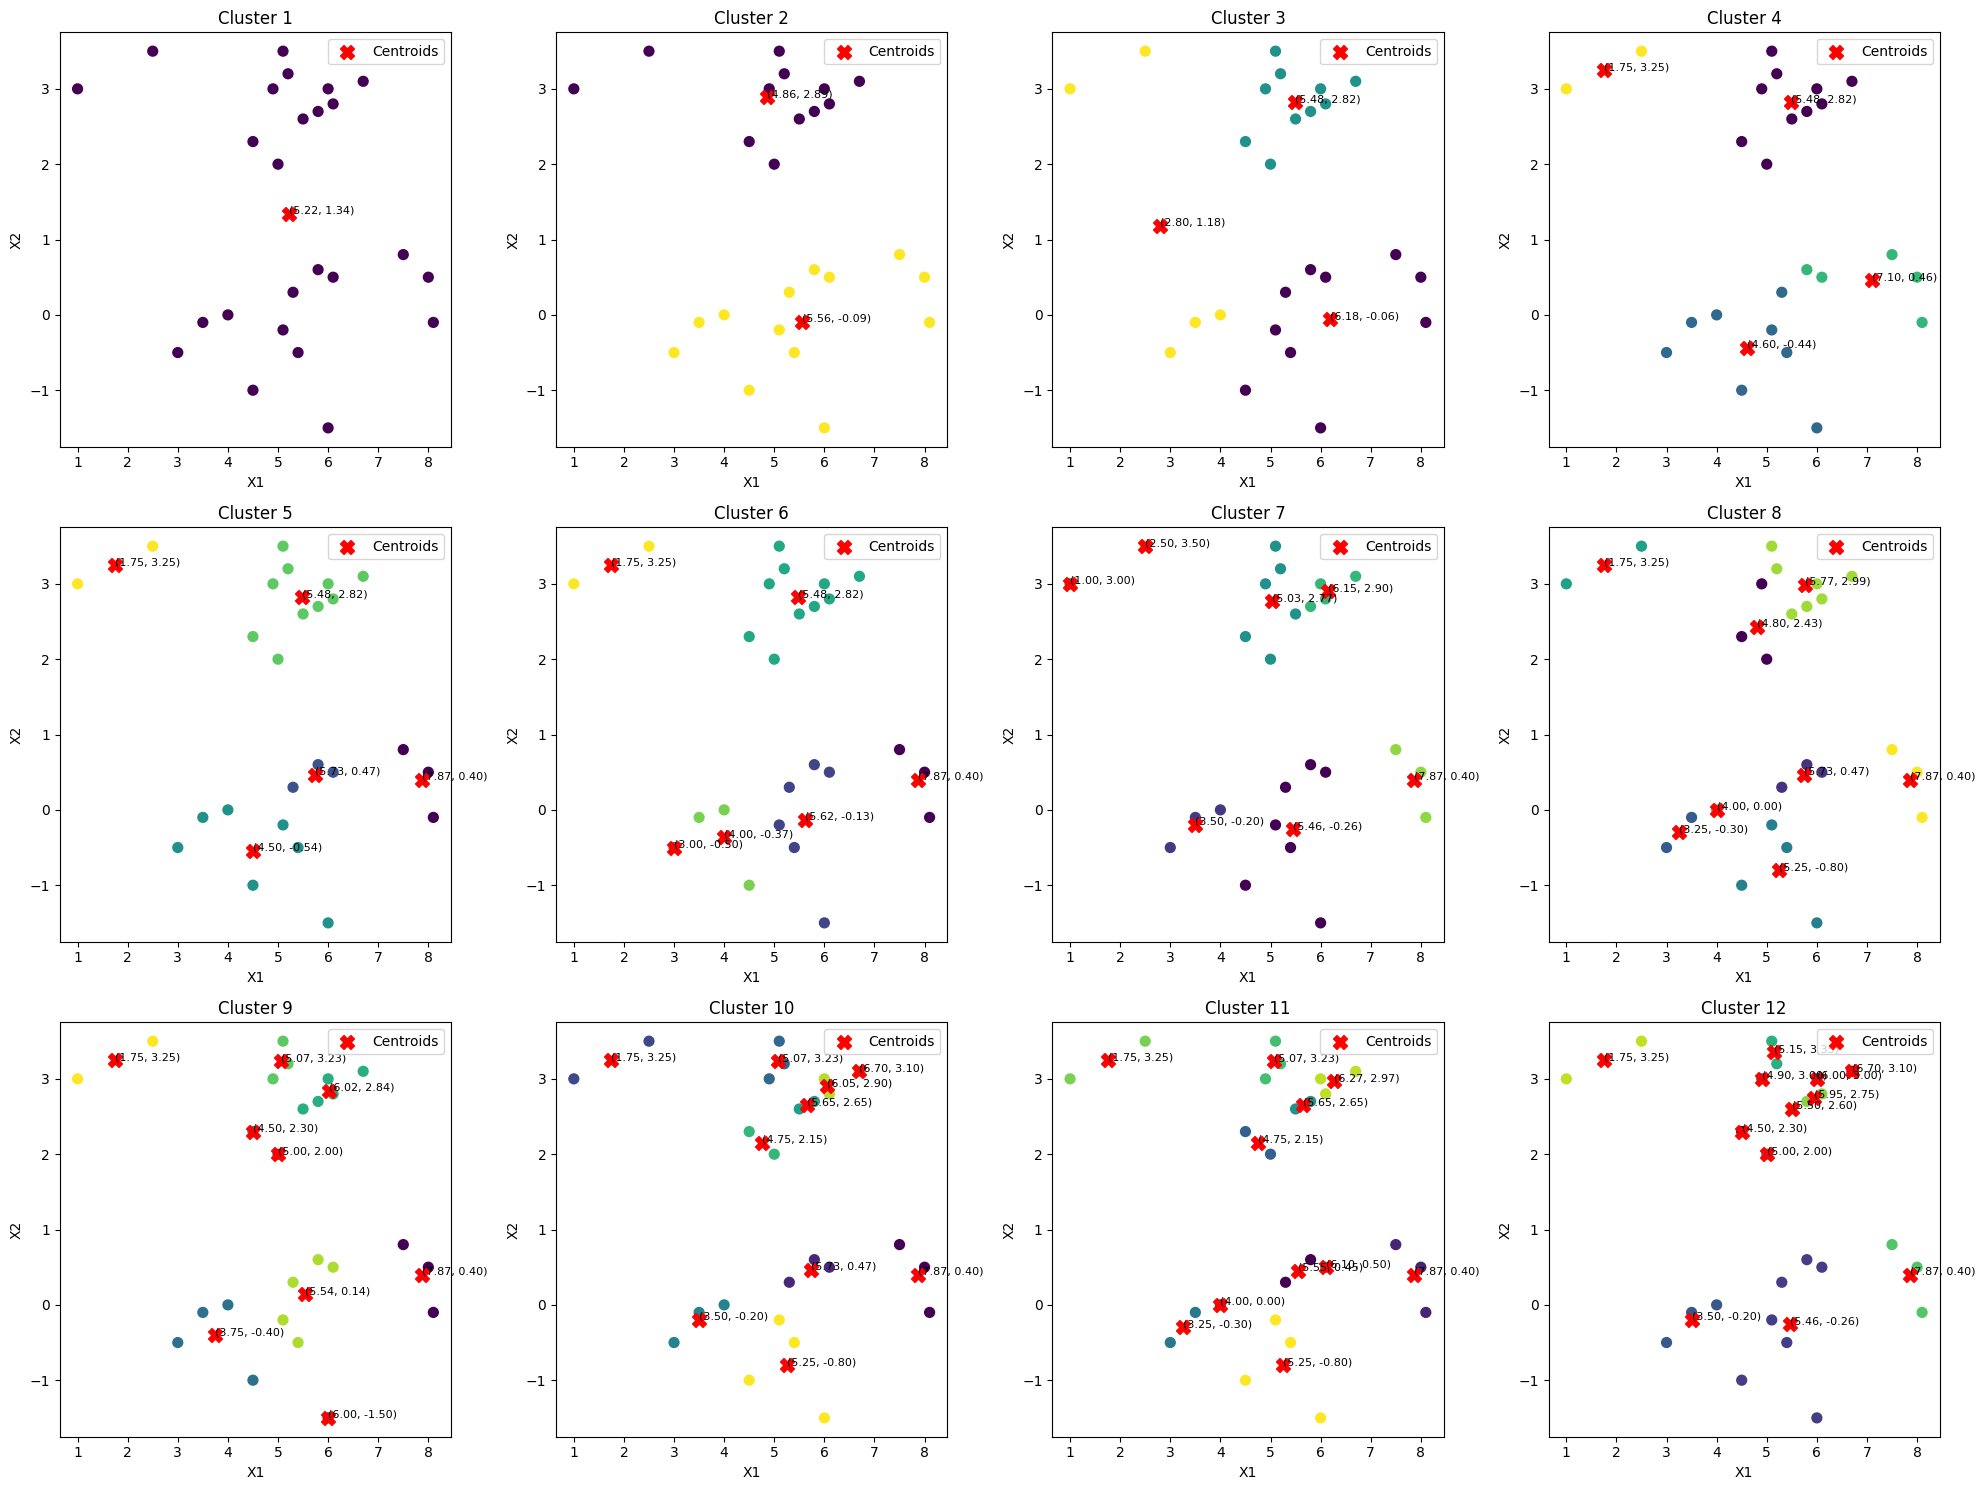

In [ ]:
plot_clusters(X, labels, centroids, [f"Cluster {i + 1}" for i in range(len(labels))])

In [ ]:
M = get_K(WCSS)
print(f"\n\033[1;34mThe Optimal Number of Clusters (M) is: \033[1;92m{M}\033[0m\n")


The Optimal Number of Clusters (M) is: 4



### Plotting Elbow Curve

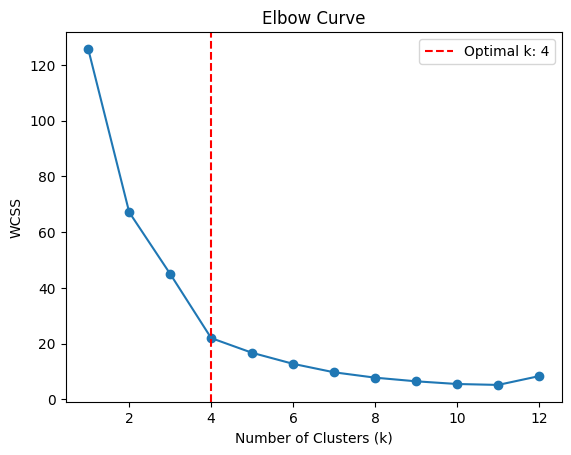

In [ ]:
plt.plot(range(1, len(X) // 2 + 1), WCSS, marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.axvline(x=M, color='red', linestyle='--', label=f'Optimal k: {M}')
plt.legend()
plt.show()